# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

Berekend vermogen: 46.05 Watt


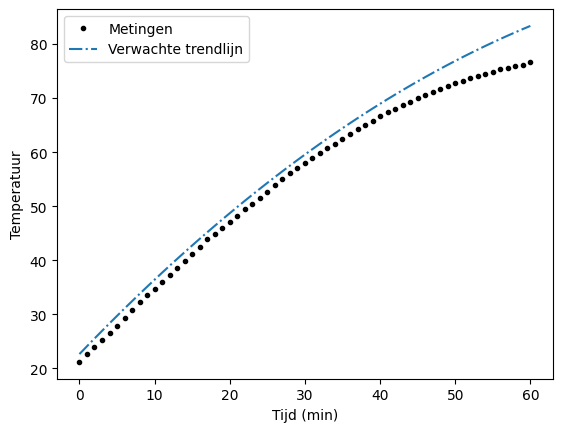

In [45]:
data = np.loadtxt('tempmetingen-54.csv', delimiter= ';', skiprows= 1)

t = data[:,0]
temp = data[:,1]

m_water_start = 1.2929 - 0.8208
m_water_eind = 1.2749 - 0.8208
c_water = 4180

dt_sec = 60
dT = temp[1] - temp[0]
P = (m_water_start * c_water * dT) / dt_sec

print(f"Berekend vermogen: {P:.2f} Watt")


T_verwacht = []
for i, time_min in enumerate(t):
    factor = 1 - 0.01 * i
    deltaT = (P * factor) / (m_water_eind * c_water) * 60
    if i == 0:
        T_verwacht.append(temp[0] + deltaT)
    else:
        T_verwacht.append(T_verwacht[-1] + deltaT)

T_verwacht = np.array(T_verwacht)

plt.figure()
plt.plot(t, temp, "k.", label='Metingen')
plt.plot(t, T_verwacht, '-.', label='Verwachte trendlijn')
plt.xlabel('Tijd (min)')
plt.ylabel('Temperatuur')
plt.legend()
plt.show()


In [46]:
t_totaal_sec = t[-1] * 60
E_in = P * t_totaal_sec

dT_totaal = temp[-1] - temp[0]
Q_water = m_water_start * c_water * dT_totaal

m_start = 1.2929 - 0.8208
m_eind = 1.2749 - 0.8208
m_verdampt = m_start - m_eind
L_v = 2.26e6

Q_verdamping = m_verdampt * L_v


E_totaal_verklaard = Q_water + Q_verdamping
Verschil = E_in - E_totaal_verklaard

print(Q_verdamping)
print("-" * 40)
print(f"Totale energie toegevoegd (E_in):   {E_in:.0f} Joule")
print("-" * 40)
print(f"Energie in opwarming water:         {Q_water:.0f} Joule")
print(f"Energie in verdamping water:        {Q_verdamping:.0f} Joule")
print("-" * 40)
print(f"Totaal verklaard (Optelsom):        {E_totaal_verklaard:.0f} Joule")
print(f"Verlies energie:                    {Verschil:.0f} Joule")

print("De totale toegevoegde energie correspondeert niet volledig met de berekende energie voor opwarming en verdamping. Dit verschil is toe te schrijven aan warmteverlies aan de omgeving.")
print("Aannames zijn gemaakt, dat de meting in theorie in een afgesloten ruimte is gedaan en dus sprake is van behoud van energie.")

40680.00000000004
----------------------------------------
Totale energie toegevoegd (E_in):   165764 Joule
----------------------------------------
Energie in opwarming water:         109325 Joule
Energie in verdamping water:        40680 Joule
----------------------------------------
Totaal verklaard (Optelsom):        150005 Joule
Verlies energie:                    15759 Joule
De totale toegevoegde energie correspondeert niet volledig met de berekende energie voor opwarming en verdamping. Dit verschil is toe te schrijven aan warmteverlies aan de omgeving.
Aannames zijn gemaakt, dat de meting in theorie in een afgesloten ruimte is gedaan en dus sprake is van behoud van energie.


Aanbeveling: doe dit in een geisoleerde ruimte afgezonderd van warmte verlies of meet ook hoeveel warmte er verloren in de ruimte eromheen. Ook kan je de beker zelf beter isoleren.